In [2]:
using Pkg
Pkg.activate("..")   

  Activating project at `d:\GitHubProjects\GeneralisedKoornwinderPolynomials.jl`


In [3]:
using GeneralisedKoornwinderPolynomials, LinearAlgebra, Plots
using SparseArrays, BlockBandedMatrices, BlockArrays, StaticArrays

In [4]:
α, β, δ, θ = -1.0, 1.0, 1.0, 4
a1, b1 = 1.0, 1.0

ρ(x)  = sqrt( Complex((1-x^2)*(0.1 - 0.4*x + 0.5*x^2)) )
ρ0(x) = sqrt( Complex(0.1 - 0.4*x + 0.5*x^2) )
Fρ1(x) = (1-x^2)*(0.1 - 0.4*x + 0.5*x^2)
Fρ2(x) = -0.2 + 0.4*x + 0.6*x^2 - x^3

gkd1 = DegenerateKoornwinderDomain(α, β, δ, ρ, a1, b1, ρ0, θ, Fρ1, Fρ2)

DegenerateKoornwinderDomain(-1.0, 1.0, 1.0, Main.ρ, 1.0, 1.0, Main.ρ0, 4, Main.Fρ1, Main.Fρ2)

In [5]:
N = 500

ops1 = DegenerateSemiclassical_Operatormatrices(gkd1, 0, N);

Laplacian_W = Koornwinder_Laplacian(gkd1, ops1, N) # # Δ_{W,(1)}^{(1)}

501×501-blocked 125751×125751 BandedBlockBandedMatrix{Float64} with block-bandwidths (4, 4) and sub-block-bandwidths block-bandwidths (2, 2) with data 9×501-blocked 45×125751 BlockedMatrix{Float64}:
 -4.26453      │   1.65784       0.0       │
 ──────────────┼───────────────────────────┼  …    ⋅       │    ⋅         ⋅   │   ⋅ 
 ──────────┼──────────────────┼─────
  1.65784      │  -6.11465       0.0       │       ⋅       │    ⋅         ⋅   │   ⋅ 
  0.0          │   0.0          -8.47145   │
 ──────────────┼───────────────────────────┼       ⋅       │    ⋅         ⋅   │   ⋅ 
 ──────────┼──────────────────┼─────
 -1.03104      │   3.26843       0.0       │       ⋅       │    ⋅         ⋅   │   ⋅ 
  0.0          │   0.0           1.60568   │       ⋅       │    ⋅         ⋅   │   ⋅ 
  1.49281e-15  │  -6.63571e-16   0.0       │
 ──────────────┼───────────────────────────┼  …    ⋅       │    ⋅         ⋅   │   ⋅ 
 ──────────┼──────────────────┼─────
 -8.83996e-16  │  -2.59376       0.0       │ 

In [6]:
f_RHS1(x,y) = 1 
f_RHS2(x,y) = (Fρ1(x)-y^2)^3
f_RHS3(x,y) = sin(50*(x - y)^2) + cos(50*(x + y)^2)

u_exact4(x,y) = (Fρ1(x)-y^2) * exp(-100 * (x^2 + y^2))
f_RHS4(x,y) = Δ(u_exact4)(x,y) 

koornwinder_coef_f1 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS1, 1, 500)
koornwinder_coef_f2 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS2, 1, 500)
koornwinder_coef_f3 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS3, 1, 500)
koornwinder_coef_f4 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS4, 1, 500)

501-blocked 125751-element BlockedVector{Float64}:
 -0.009537163136474172
 ─────────────────────
 -0.034484089918775655
  0.0                 
 ─────────────────────
 -0.002698172407324209
  0.0                 
  0.014874815059092106
 ─────────────────────
  0.05836602803070208 
  0.0                 
  0.0672776514903568  
 -0.0                 
 ─────────────────────
  ⋮
 -0.0                 
 -0.0                 
 -0.0                 
 -0.0                 
 -0.0                 
 -0.0                 
 -0.0                 
 -0.0                 
  0.0                 

In [7]:
koornwinder_coef_u1  = Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f1[Block.(1:401)]
koornwinder_coef_u2 =  Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f2[Block.(1:401)]
koornwinder_coef_u3 =  Laplacian_W[Block.(1:401), Block.(1:401)] \ mortar([blocks(koornwinder_coef_f3[Block.(1:180)]); blocks(zeros(Float64, blockedrange(181:401)))])
koornwinder_coef_u4 =  Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f4[Block.(1:401)]

401-blocked 80601-element BlockedVector{Float64}:
  0.007451207345376049   
 ────────────────────────
  0.01134420199426794    
 -0.0                    
 ────────────────────────
 -0.003328537514577354   
 -0.0                    
 -0.002237889662940635   
 ────────────────────────
 -0.012880132242223761   
 -0.0                    
 -0.006609142113754554   
 -0.0                    
 ────────────────────────
  ⋮
  1.127267024839681e-148 
 -0.0                    
 -1.4537505792026456e-150
 -0.0                    
  1.3860379304163556e-152
  0.0                    
 -8.426628720493825e-155 
 -0.0                    
  2.1044424468887993e-157

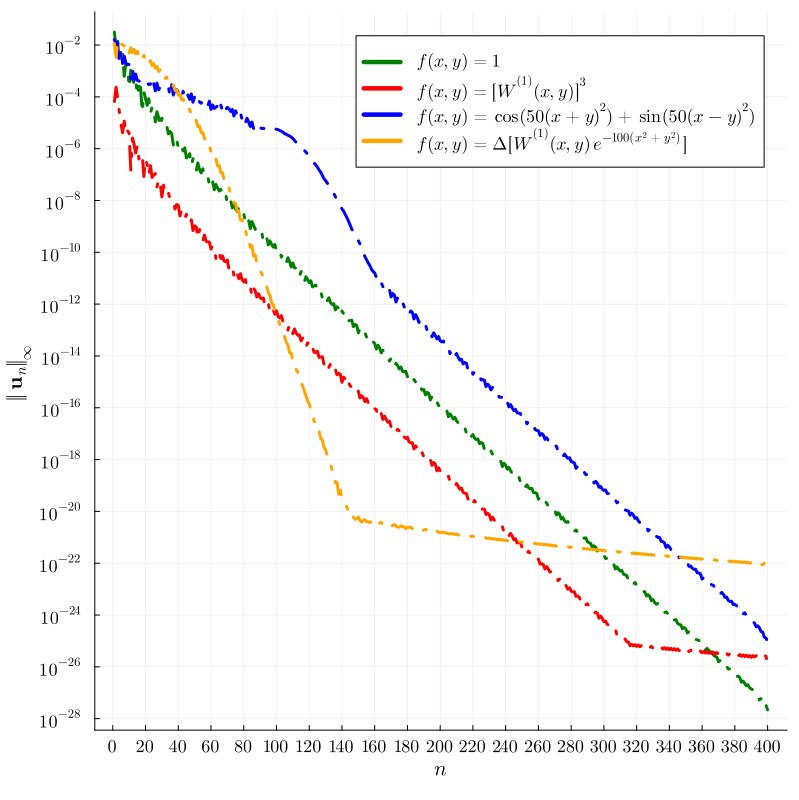

In [8]:
x_vals = 1:400
y_vals11 = zeros(length(x_vals))
y_vals22 = zeros(length(x_vals))
y_vals33 = zeros(length(x_vals))
y_vals44 = zeros(length(x_vals))

for i in 1:length(x_vals)
    n = x_vals[i] 
    y_vals11[i] = norm(koornwinder_coef_u1[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals22[i] = norm(koornwinder_coef_u2[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals33[i] = norm(koornwinder_coef_u3[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals44[i] = norm(koornwinder_coef_u4[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
end

xtick_exponents = 0:20:400
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -2:-2:-28
ytick_vals = 10.0 .^ ytick_exponents
ytick_labels = ["\$10^{$(y)}\$" for y in ytick_exponents]

plot(
    x_vals, y_vals11;
    #xaxis = :log10,
    size = (800,800),
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :green,
    marker = :none,
    label = "\$f(x,y)=1\$",
    legend = :topright,
    tickfontsize = 12,
    legendfontsize = 12,
    guidefontsize = 14
    #legend_position =(0.4, 0.4)
)

plot!(
    x_vals, y_vals22;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :red,
    marker = :none,
    label = "\$f(x,y)= [W^{(1)}(x,y)]^3 \$",
    legend = :topright,
    #legend_position =(0.4, 0.4)
)

plot!(
    x_vals, y_vals33;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :blue,
    marker = :none,
    label = "\$f(x,y)= \\cos(50(x + y)^2) + \\sin(50(x - y)^2) \$",
    legend = :topright,
    #legend_position =(0.4, 0.4)
)


plot!(
    x_vals, y_vals44;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :orange,
    marker = :none,
    label = "\$f(x,y) = \\Delta[W^{(1)}(x,y)\\,e^{-100(x^2+y^2)} ]\$",
    legend = :topright,
    #legend_position =(0.4, 0.4)
)

In [9]:
u_approx4 = Koornwinder_synthesis_transform(gkd1, ops1, koornwinder_coef_u4, 1, 200)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(-0.67, 0.67, length=100)   
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if -1* sqrt(Fρ1(x)) <= y <= 1* sqrt(Fρ1(x))
            z_vals1[i, j] = u_approx4(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

x_vals0 = range(α, β, length=100) 
y_vals0 = range(-0.67, 0.67, length=100) 
z_vals0 = zeros(length(x_vals0), length(y_vals0))

for i in 1:length(x_vals0)
    for j in 1:length(y_vals0)
        x = x_vals0[i]
        y = y_vals0[j]
        if -0.1* sqrt(Fρ1(x)) <= y <= 0.1* sqrt(Fρ1(x))
            z_vals0[i, j] = u_exact4(x, y)
        else
            z_vals0[i, j] = NaN
        end
    end
end

mask = .!isnan.(z_vals0) .& .!isnan.(z_vals1)

abs_err_inf = maximum(abs.(z_vals1[mask] .- z_vals0[mask]))
den = maximum(abs.(z_vals0[mask]))  # ||z0||_inf

rel_inf = den == 0 ? (abs_err_inf == 0 ? 0.0 : Inf) : abs_err_inf / den 
println("Absolute ∞-norm error = ", abs_err_inf)
println("Relative ∞-norm error = ", rel_inf)

Absolute ∞-norm error = 1.3850309787954984e-12
Relative ∞-norm error = 1.3511397871945718e-11


In [ ]:
u_approx3 = Koornwinder_synthesis_transform(gkd1, ops1, koornwinder_coef_u3, 1, 200)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(-0.67, 0.67, length=100)   
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if -1* sqrt(Fρ1(x)) <= y <= 1* sqrt(Fρ1(x))
            z_vals1[i, j] = u_approx3(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

xtick_exponents = -1.0:0.5:1.0
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -0.5:0.25:0.5
ytick_vals = ytick_exponents
ytick_labels = ["\${$(y)}\$" for y in ytick_exponents]


contourf(
    x_vals1, y_vals1, z_vals1' .* 1e2;

    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    framestyle = :box,
    color = :inferno,
    linewidth = 0,
    levels = 100,
    xlabel = "\$x\$",
    ylabel = "\$y\$",
    aspect_ratio = :equal,
    xlims = (α, β),
    ylims = (-0.67, 0.67),
    size = (700, 850),
    #colorbar_ticks = colorbar_ticks,
    #colorbar_title = "\$\\times \\,10^{-2}\$",
    #colorbar_titlepadding = 5,
    grid = false,

    tickfont = font(10),
    guidefont = font(14),
        
)

x_edge = range(α, β, length=1200)
y_top = δ * real.(ρ.(x_edge))
y_bottom = -δ * real.(ρ.(x_edge))

y_left = [-δ * real(ρ(α)), δ * real(ρ(α))]
y_right = [-δ * real(ρ(β)), δ * real(ρ(β))]
plot!(x_edge, y_top, color=:black, lw=1.0, label=false)
plot!(x_edge, y_bottom, color=:black, lw=1.0, label=false)

plot!([α, α], y_left, color=:black, lw=1.0, label=false)
plot!([β, β], y_right, color=:black, lw=1.0, label=false)
annotate!(1.05, 0.75, Plots.text("\$\\times \\, 10^{-2}\$", :left, 14))

![](BowlingPinDomain_Poisson.png)